In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Data description:**
Player.csv is a 196 by 7 data set, compiling data collected about the players that participated in the minecraft server. The 7 variables are as follows: 

1. experience
    - catagorical
    - sorts players by their prior expirience with video games
    - catagories: Beginner, Amature, Regular, Vetran, Pro
2. subscribe
   - TRUE or FALSE
   - sorts players by if they are subscribed to a game related news letter or not
3. hashedEmail
    - catagorical
    - the email for every individual player
    - unique for every row
4. played_hours
    - numeric
    - hours the player has played
    - one decimal point
5. name
    - catagorical
    - the name of the individual player
    - unique for every row
6. gender
    - catagorical
    - the stated gender of the player
    - catagories: Male, Female, Non-binary, Prefer not to say, Agender, Two-spirited, Other
7. age
    - numeric
    - the age of the player
    - no decimals 

Variables with a unique class for every row are pointless to analyse and cannot help with predictions. The expirence catagory seems fairly subjective as there is no clear citeria or explanation for how expirience was decided. Gender could be difficult to use as the frequency of the catagorise is unbalanced with Male appearing far more often than other catagories, additionally Female is far more frequent than the other minority catagories in the column. 

**Questions:**
Using player.csv we will try to answer the broad question of: What player charecteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? Specifically we will see if age and gender can be used to predict subscription status using players.csv. 
players.csv follows the basic rules of tidy data, as each row is a single observation, each column is a single variable and each value is a single cell, however the "Age" and "hashedEmail" columns do not follow correct column name convetions and should be changed to be all lowercase. 

In [2]:
#read my data from the raw url commited to my github repository
#mutate and select to change the column names to be more conventional
player_data_untidy <- read_csv("https://raw.githubusercontent.com/Ewancoding/Individual_project_planning/7617322d5675a6d0927c9207dbfb67807994ffea/players.csv")
player_data <- mutate(player_data_untidy, hashed_email = hashedEmail, age = Age) |> 
select( -hashedEmail, -Age)
player_data
                        

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,name,gender,hashed_email,age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,9
Veteran,TRUE,3.8,Christian,Male,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,17
Veteran,FALSE,0.0,Blake,Male,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Dylan,Prefer not to say,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,57
Amateur,FALSE,2.3,Harlow,Male,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,17
Pro,TRUE,0.2,Ahmed,Other,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,NA


In [3]:
#mean value of the numeric variables

#played_hours
played_hours_mean <- player_data |>
summarize(played_hours_mean = mean(played_hours, na.rm = TRUE))
played_hours_mean

#age
age_mean <- player_data |>
summarize(age = mean(age, na.rm = TRUE))
age_mean

played_hours_mean
<dbl>
5.845918


age
<dbl>
21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


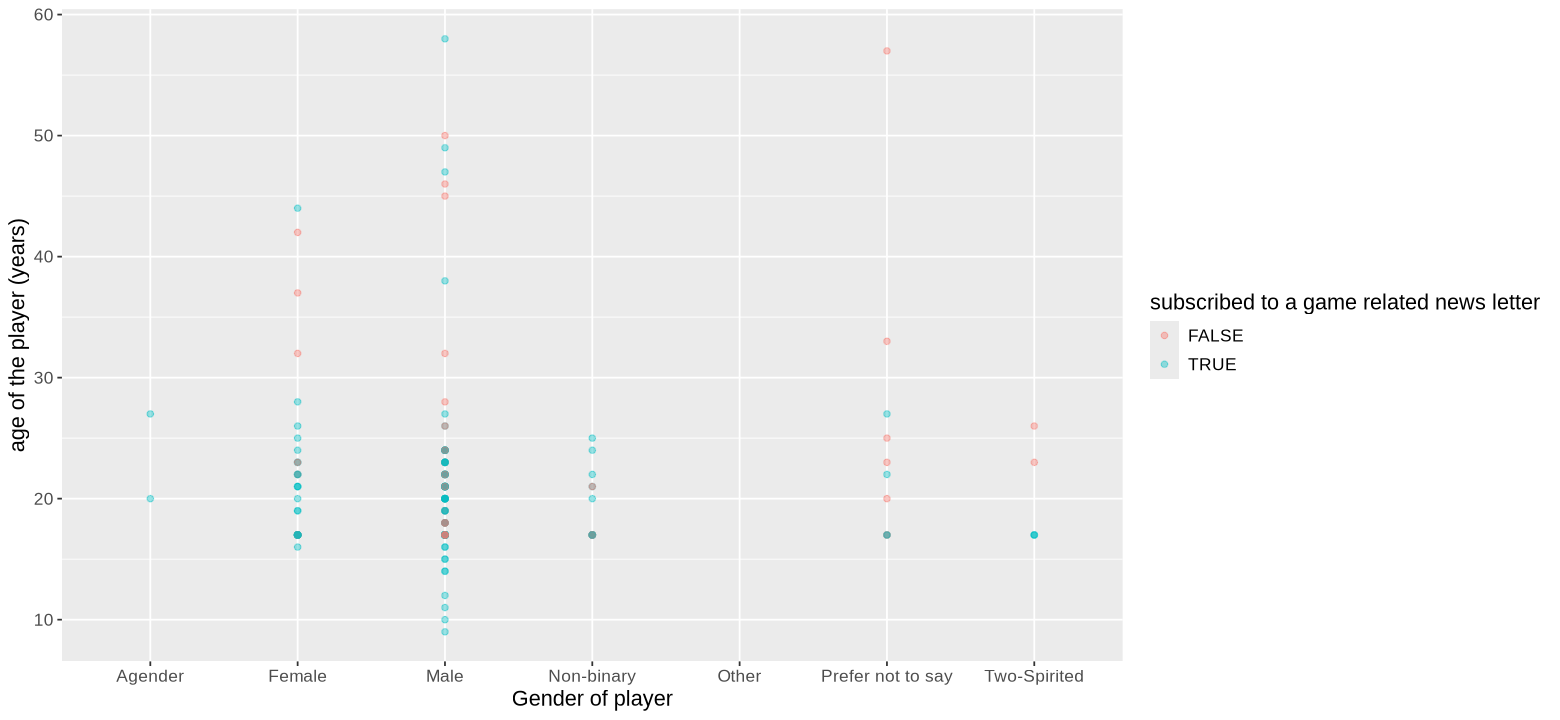

In [4]:
#a scatter plot assesing the relationship between age, gender and subscription status
options(repr.plot.height = 6, repr.plot.width = 13) #control size of the plot
player_age_gender_plot <- player_data |>
ggplot(aes(x = gender, y = age, color = subscribe)) +
geom_point(alpha = 0.4) + 
labs(x = "Gender of player", y = "age of the player (years)", color = "subscribed to a game related news letter") +
theme(text = element_text(size = 13))
player_age_gender_plot
#the visualization is difficult to read as age overlap is hard to see, but we can still get a general idea of how age and gender corelate with subscription status

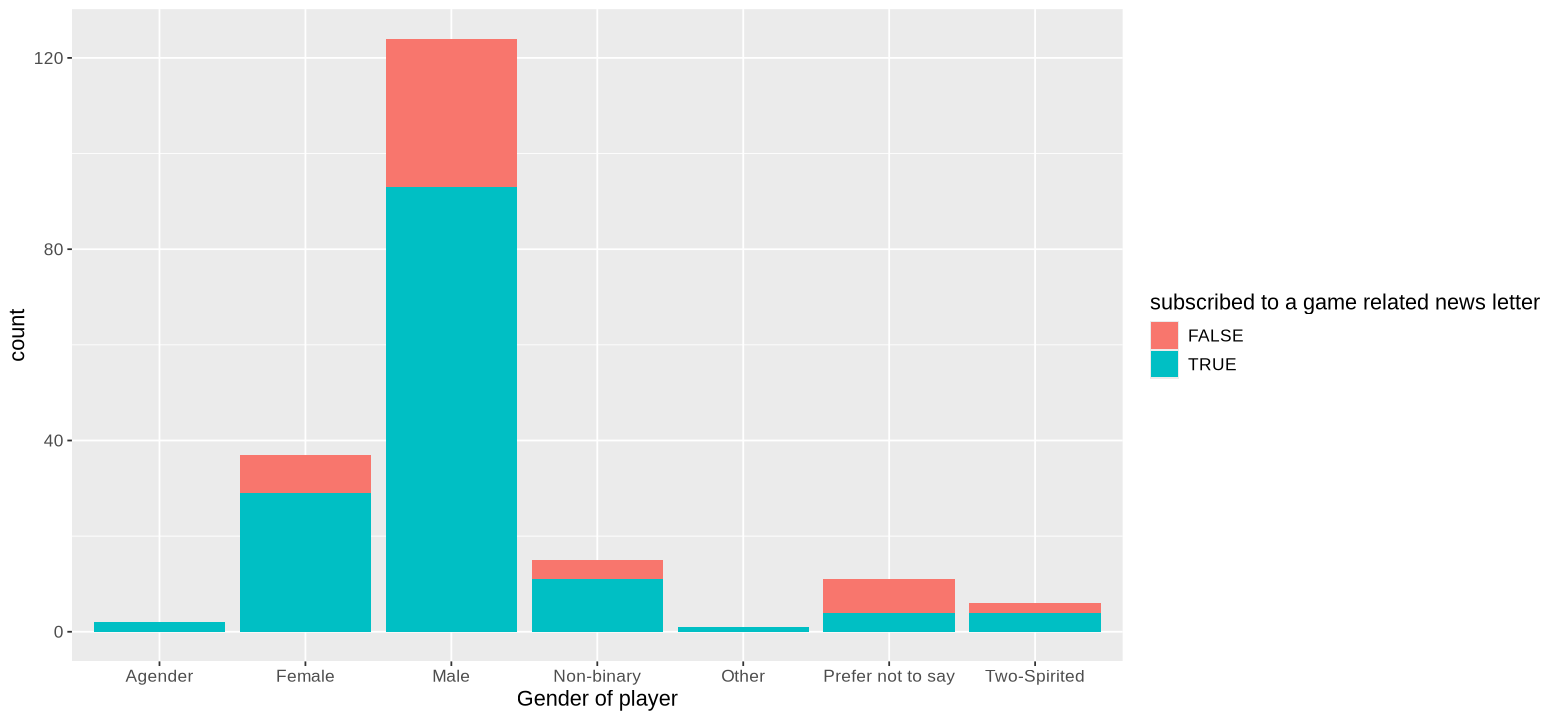

In [5]:
#a bar graph seems like a better way to visualize the subsciption status of players of diffrent genders.
options(repr.plot.height = 6, repr.plot.width = 13) #control size of the plot
player_gender_plot <- player_data |>
ggplot(aes(x = gender, fill = subscribe)) +
geom_bar() + 
labs(x = "Gender of player", fill = "subscribed to a game related news letter") +
theme(text = element_text(size = 13))
player_gender_plot
#From this plot we can see that the majority of every gender is subscribed with the exception of prefer not to say, however Male has the lowest subscription percentage among majority subscibed genders

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


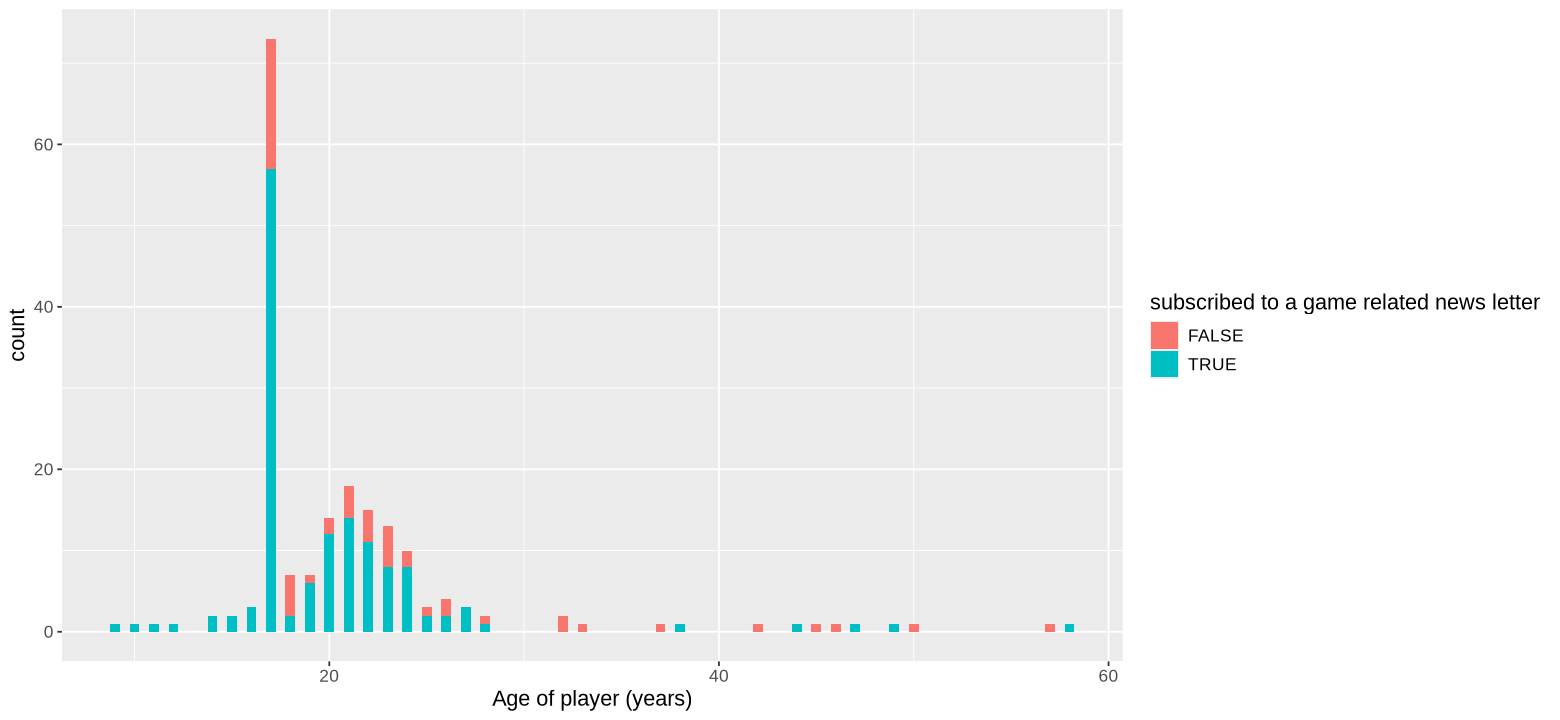

In [6]:
#a histogram allows us to clearly see how many players belong to each age as well as how many players of that specific age are subscribed
options(repr.plot.height = 6, repr.plot.width = 13) #control size of the plot
player_age_plot <- player_data |>
ggplot(aes(x = age, fill = subscribe)) +
geom_histogram(bins = 51, binwidth = 0.5) + 
labs(x = "Age of player (years)", fill = "subscribed to a game related news letter") +
theme(text = element_text(size = 13))
player_age_plot
#the visualization is very precis and allows us to see age distribution as well as subscription distribution among age groups
#there are far more 17 year olds than any other age, additionally it seems most older people (above 30) are unsubscribed and every player 16 and below are subscribed

**Method:** 
To answer the question I will be using knn classification as it allows us to predict catagorical variables using other variables in the data. Important requirments for the knn model is that the data must be standardized so that the selection of nearest neighbor will not favour one variable over the other. A problem with using this model is that I will have to mutate "gender" to create dummy variables to use as predictors as the raw catagorical variable cannot be used as a predictor. The process of knn classification requires splitting a percentage of the data into training and testing sets as well as folds within the training set to determine the best number of neighbors for the best predictions. To evaluate the quality of the predictions we will have to determine if accuracy, precision or recall is the best for our data. Use cross validation on the training set, selecting one of the folds to be the validation set and test the k values on it then evaluate with one of the evaluation methods mentioned earlier. 
